In [2]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import data_fcts as df

# Population = 100

In [2]:
exp_folder = "/home/leni/are-logs/mnipes/"


In [3]:
parent_fits = []
for sync in os.listdir(exp_folder):
    for target in os.listdir(exp_folder + "/" + sync):
        for replicate in os.listdir(exp_folder + "/" + sync + "/" + target):
            folder = exp_folder + "/" + sync + "/" + target + "/" + replicate
            print(folder)
            parent_ids = df.load_parent_pool(folder + "/genomes_pool.csv")
            ids, parents, fitnesses,evals, deltas = df.load_fitness(folder + "/fitnesses.csv")
            
            fits = [[i,p[0],p[1],f,e,d,sync,target,replicate] for i, p, e, d, f in zip(ids,parents,evals,deltas,fitnesses)]
            eval_times = df.load_comp_time(folder +"/times.csv")
            fits = df.add_comp_time(fits,eval_times)
            parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","parent 1","parent 2","fitness","number of evaluations","learning delta","synchronicity","target delta","replicate","computational time","wall time","discretised time"])


/home/leni/are-logs/mnipes//sync/target_4/mnipes2_16_1_15-12-41-1335-2026698784
/home/leni/are-logs/mnipes//sync/target_4/mnipes2_20_1_0-56-10-599-3680641556
/home/leni/are-logs/mnipes//sync/target_4/mnipes2_20_1_3-41-37-7961-2321178279
/home/leni/are-logs/mnipes//sync/no_target/mnipes2_20_1_4-55-12-2042-467855710
/home/leni/are-logs/mnipes//sync/no_target/mnipes2_16_1_15-11-54-4083-39461721
/home/leni/are-logs/mnipes//sync/no_target/mnipes2_20_1_5-1-45-5493-2983899542
/home/leni/are-logs/mnipes//sync/target_8/mnipes2_19_1_11-13-2-2704-258224514
/home/leni/are-logs/mnipes//sync/target_8/mnipes2_16_1_15-12-58-8397-97627319
/home/leni/are-logs/mnipes//sync/target_8/mnipes2_19_1_11-13-1-1828-531447350
/home/leni/are-logs/mnipes//sync/target_6/mnipes2_16_1_15-12-51-1387-3880451573
/home/leni/are-logs/mnipes//sync/target_6/mnipes2_19_1_23-31-32-2798-2032189678
/home/leni/are-logs/mnipes//sync/target_6/mnipes2_19_1_11-24-52-2509-3959161847
/home/leni/are-logs/mnipes//asyn/target_4/mnipes2_19

In [4]:
print(par_fit_data)

         iteration  robot index  parent 1  parent 2   fitness  \
0                0          177        -1        -1  0.109375   
1                0           88        -1        -1  0.015625   
2                0           84        -1        -1  0.015625   
3                0           67        -1        -1  0.031250   
4                0           73        -1        -1  0.015625   
...            ...          ...       ...       ...       ...   
1019595        906         2637      2343      2357  0.203125   
1019596        906         2657      1944      1818  0.203125   
1019597        906         2669      1714      2008  0.203125   
1019598        906         2663      1985      1089  0.203125   
1019599        906         2675      2048      2343  0.203125   

         number of evaluations  learning delta synchronicity target delta  \
0                           40        0.062500          sync     target_4   
1                          230        0.000000          sync     

## Fitnesses

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

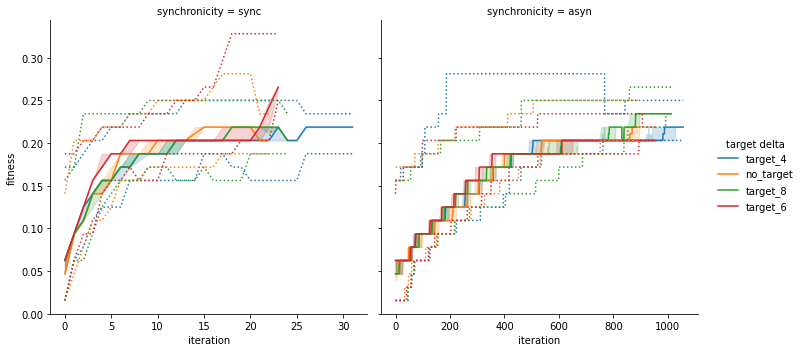

In [9]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")
#sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.max,ci=None,color='b')
#sns.lineplot(data=par_fit_data,x="iteration",y="fitness",linestyle=":",estimator=np.min,ci=None,color='b')

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

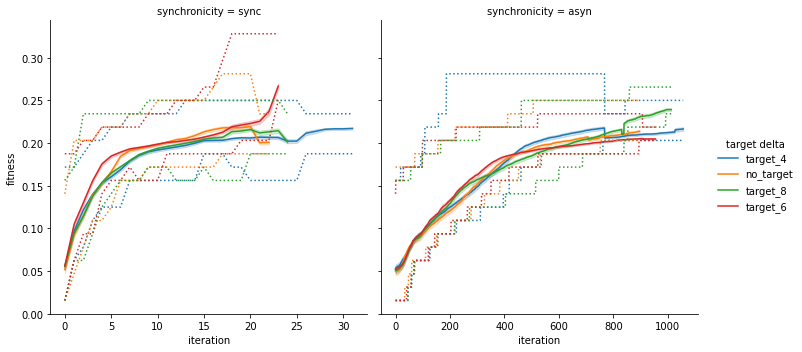

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

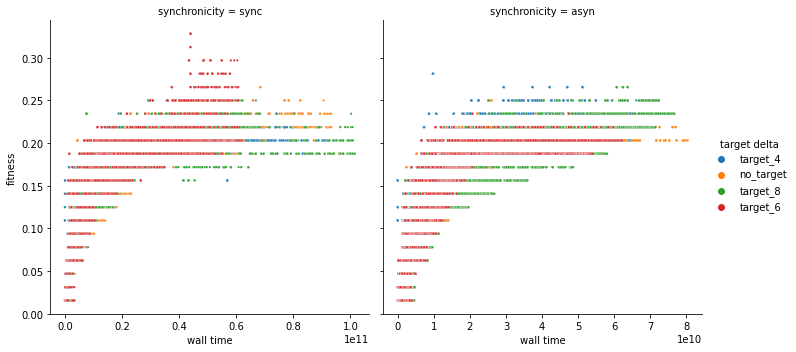

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="scatter",x="wall time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False},s=5)

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

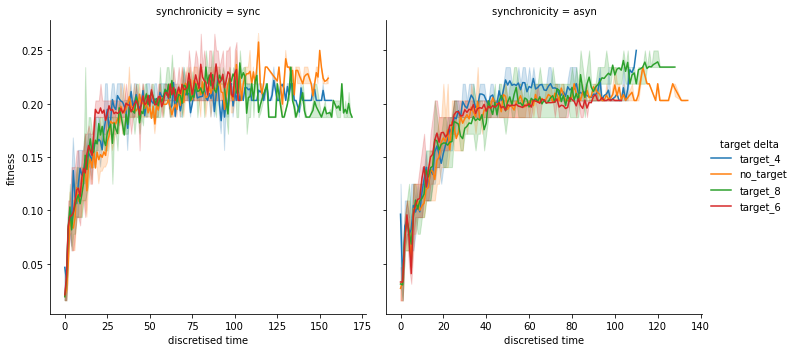

In [5]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),facet_kws={"sharex": False})

## Learning Delta

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

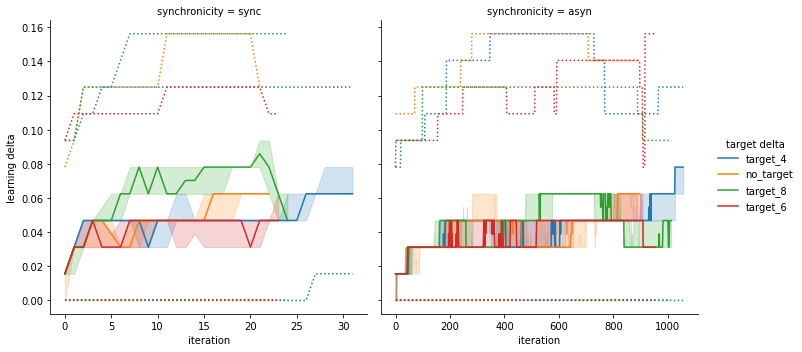

In [10]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

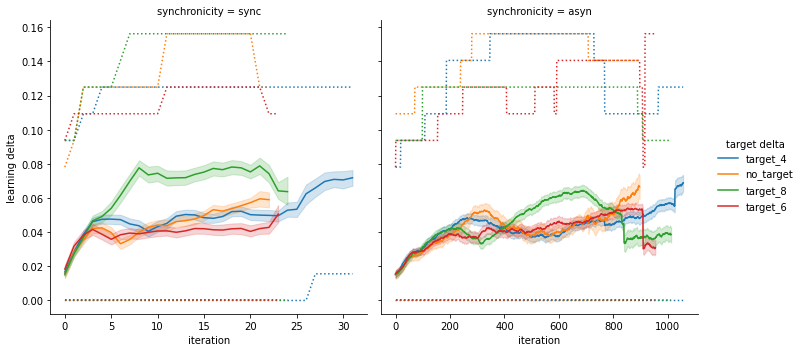

In [13]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

## Number of evaluations and Computational Time

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

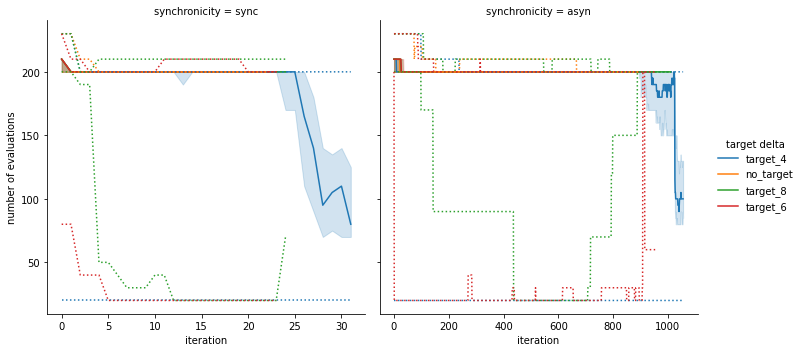

In [11]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

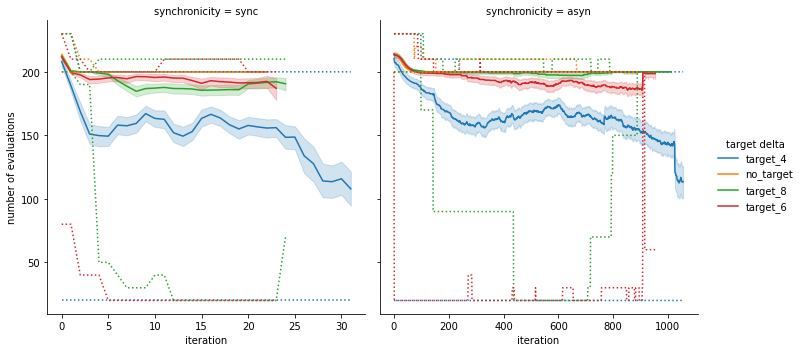

In [12]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

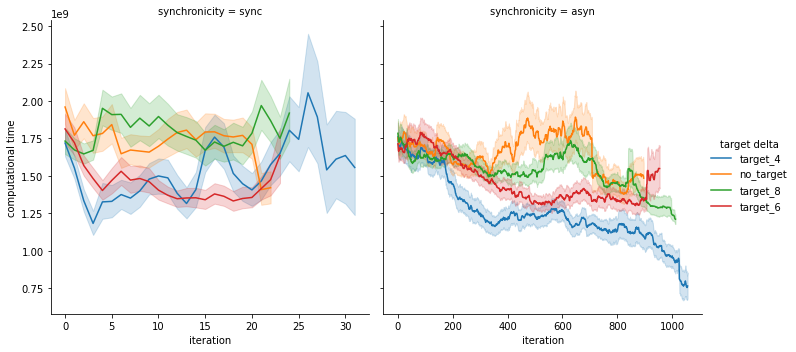

In [14]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="computational time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="max")
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

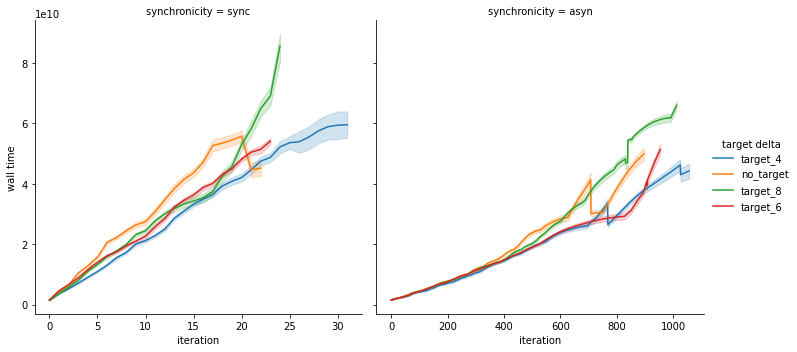

In [9]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="wall time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})

# Population = 50

In [4]:
exp_folder = "/media/leni/DATADRIVE1/are-logs/mnipes_explo/"

In [16]:
parent_fits = []
for sync in os.listdir(exp_folder):
    for target in os.listdir(exp_folder + "/" + sync):
        for replicate in os.listdir(exp_folder + "/" + sync + "/" + target):
            folder = exp_folder + "/" + sync + "/" + target + "/" + replicate
            print(folder)
            parent_ids = df.load_parent_pool(folder + "/genomes_pool.csv")
            ids, parents, fitnesses,evals, deltas = df.load_fitness(folder + "/fitnesses.csv")
            
            fits = [[i,p[0],p[1],f,e,d,sync,target,replicate] for i, p, e, d, f in zip(ids,parents,evals,deltas,fitnesses)]
            eval_times = df.load_comp_time(folder +"/times.csv")
            fits = df.add_comp_time(fits,eval_times)
            parent_fits += df.filter_to_parent_pool(fits,parent_ids)
par_fit_data = pd.DataFrame(data=parent_fits,columns=["iteration","robot index","parent 1","parent 2","fitness","number of evaluations","learning delta","synchronicity","target delta","replicate","computational time","wall time","discretised time"])


/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/no_target/mnipes2_4_2_14-34-10-800-1344980658
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/no_target/mnipes2_4_2_14-34-7-7786-4032119941
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_2/mnipes2_4_2_14-34-39-9788-4178608970
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_2/mnipes2_4_2_14-34-42-2832-1873397715
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_2/mnipes2_4_2_14-34-45-5801-462096686
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_4/mnipes2_4_2_15-15-36-6842-1846758287
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_4/mnipes2_4_2_16-35-16-6700-3391351332
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_4/mnipes2_4_2_16-35-16-6700-727452125
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_6/mnipes2_6_2_20-40-52-2624-4090849152
/media/leni/DATADRIVE1/are-logs/mnipes_explo//asyn/target_6/mnipes2_6_2_21-54-53-3880-426249805
/media/leni/DATADRIVE1/are-logs/m

## Fitnesses

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

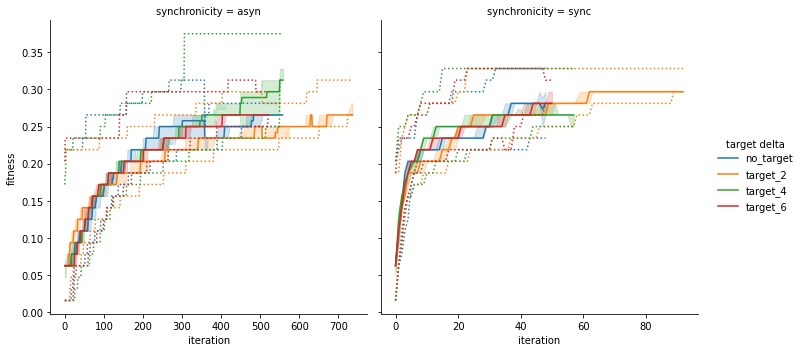

In [17]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

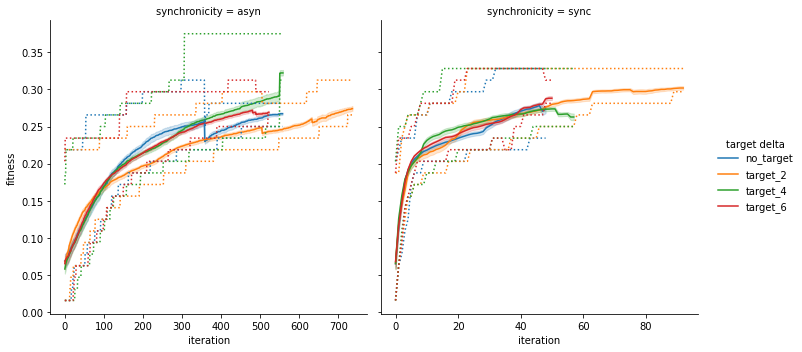

In [18]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="fitness",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="fitness",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

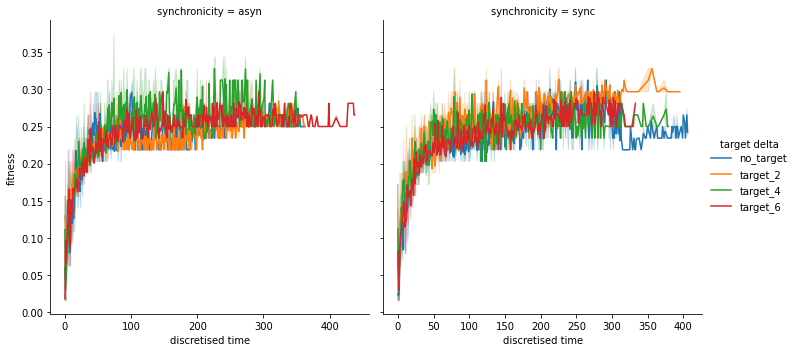

In [19]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="discretised time",y="fitness",hue="target delta",col="synchronicity",estimator="mean",errorbar=("pi",50),facet_kws={"sharex": False})

## Learning Delta

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

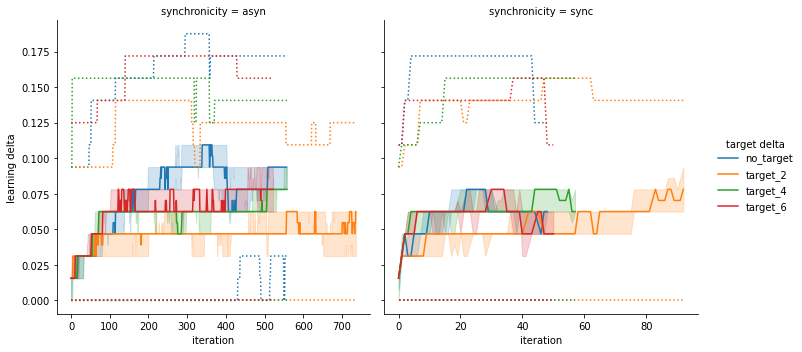

In [20]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

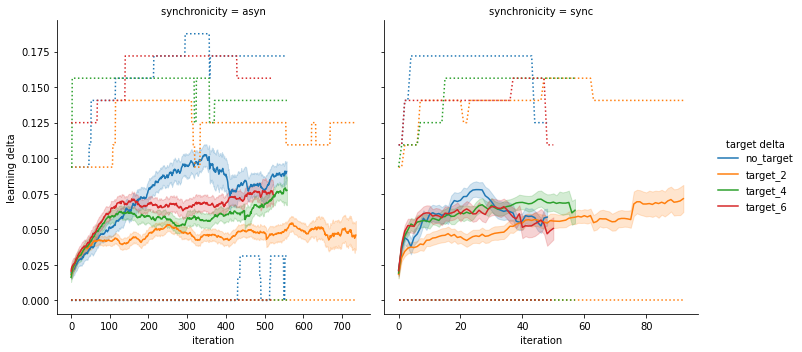

In [21]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="learning delta",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="learning delta",ci=None,hue="target delta",linestyle=":",estimator="min")

## Number of Evaluations and Computational Time

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

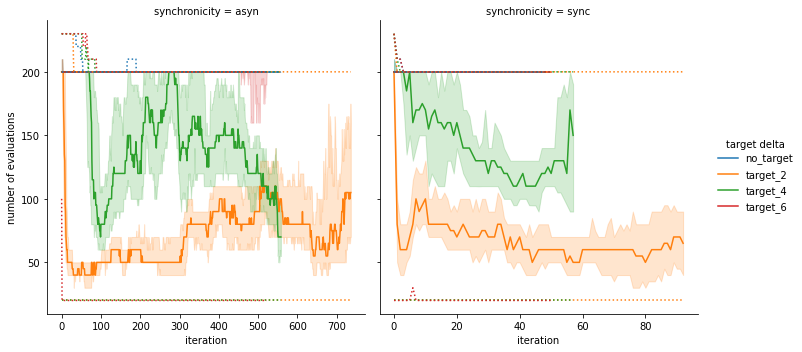

In [22]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator=np.median,facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.p

<Figure size 2880x2880 with 0 Axes>

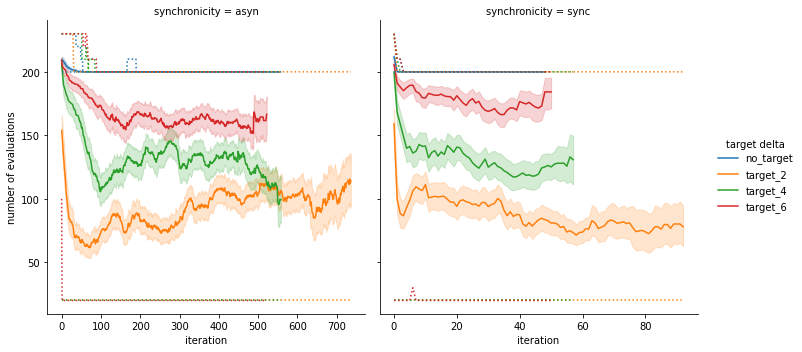

In [23]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="number of evaluations",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="max")
g.map_dataframe(sns.lineplot,x="iteration",y="number of evaluations",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

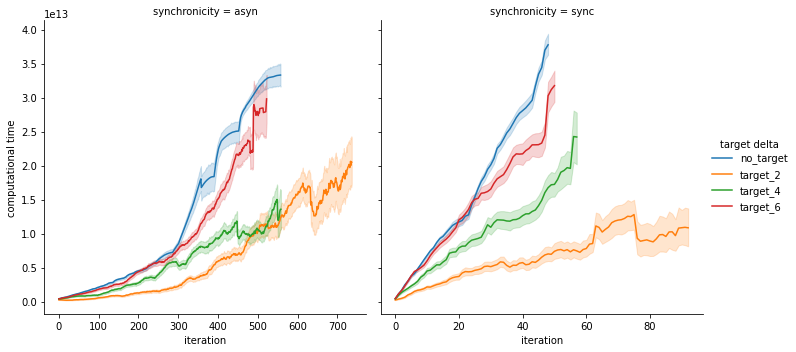

In [24]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="computational time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="max")
#g.map_dataframe(sns.lineplot,x="iteration",y="computational time",ci=None,hue="target delta",linestyle=":",estimator="min")

/home/leni/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2880x2880 with 0 Axes>

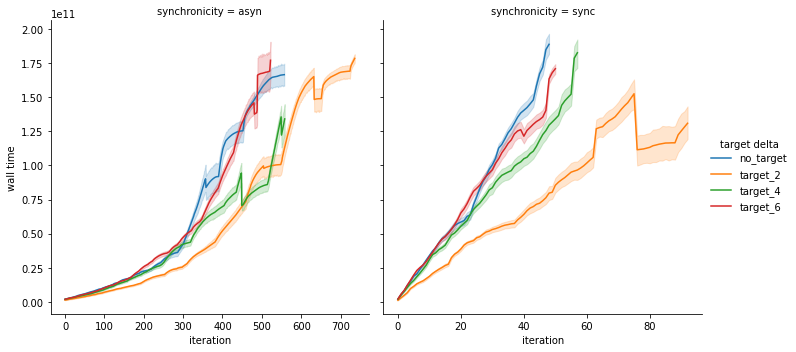

In [25]:
fig = plt.gcf()
fig.set_size_inches(40,40)
g = sns.relplot(data=par_fit_data,kind="line",x="iteration",y="wall time",hue="target delta",col="synchronicity",estimator="mean",facet_kws={"sharex": False})